# nema3 PDE=0.3, sigmaT = 50 ps, SiPMs naked all 

- Phantom : nema 3
- Events: all
- Detector geometry: SiPMs in LXe, with naked sipms
- Time resolution: 50 ps
- qcut > 5 pes
- ntof > 7
- PDE = 0.3

In [1]:
import Pkg

In [3]:
Pkg.add.(["HTTP", "Plots", "DataFrames", "HDF5","DrWatson", "StatsBase", "PhysicalConstants"]);

In [6]:
Pkg.add.(["LsqFit","GLM"])

2-element Vector{Nothing}:
 nothing
 nothing

In [7]:
Pkg.add("Distributions") 

In [1]:
#using Distributions

In [2]:
#using LsqFit
#using GLM
#using HTTP
#using Test

In [2]:
using Plots
using DataFrames
using HDF5
using DrWatson
using PhysicalConstants
using PhysicalConstants.CODATA2018
using Unitful

In [3]:
using Glob
using CSV

In [4]:
using Statistics
using StatsBase
using Printf

In [5]:
using Logging

In [6]:
@quickactivate "JPetalo"

In [7]:
pwd()

"/Users/jj/JuliaProjects/JPetalo/notebooks"

In [8]:
datadir()

"/Users/jj/JuliaProjects/JPetalo/data"

In [9]:
srcdir()

"/Users/jj/JuliaProjects/JPetalo/src"

In [267]:
include(srcdir("JPetalo.jl"))

Main.JPetalo

In [11]:
import Unitful:
    nm, μm, mm, cm, m, km, inch, ft, mi,
    ac,
    mg, g, kg,
    Ra, °F, °C, K,
    rad, °,
    ns, μs, ms, ps, s, minute, hr, d, yr, Hz,
    eV,
    μJ, mJ, J,
	mW, μW, W,
    A, N, mol, mmol, V, L, mL, μL, M

In [12]:
function loglevel(log)
    if log == "Debug"
        logger = SimpleLogger(stdout, Logging.Debug)
    elseif log =="Info"
        logger = SimpleLogger(stdout, Logging.Info)
    else
        logger = SimpleLogger(stdout, Logging.Warn)
    end
    old_logger = global_logger(logger)
end

loglevel (generic function with 1 method)

In [13]:
loglevel("Warn")

Base.CoreLogging.SimpleLogger(IJulia.IJuliaStdio{Base.PipeEndpoint}(IOContext(Base.PipeEndpoint(RawFD(44) open, 0 bytes waiting))), Info, Dict{Any, Int64}())

## Read data file with nema3 events, phot interactions with 2 gammas in detector

In [228]:
filename = "n3-phot-quartz"
sipm = "quartz"
proc ="phot"

ndf = JPetalo.readdf(filename) 
println("reading ", filename, " length =", nrow(ndf))

reading n3-phot-quartz length =72773


In [229]:
println(names(ndf))

["nsipm1", "nsipm2", "phistd1", "phistd2", "q1", "q2", "r1", "r2", "t1", "t2", "ta1", "ta2", "tr1", "tr2", "ux", "uy", "uz", "x1", "x2", "xb1", "xb2", "xr1", "xr2", "xs", "xt1", "xt2", "y1", "y2", "yb1", "yb2", "yr1", "yr2", "ys", "yt1", "yt2", "z1", "z2", "zb1", "zb2", "zr1", "zr2", "zs", "zstd1", "zstd2", "zt1", "zt2"]


## q1 vs q2

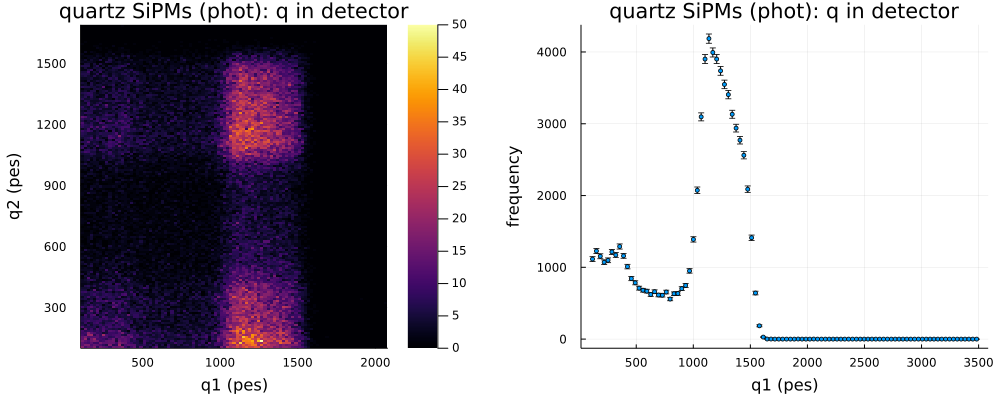

In [230]:
JPetalo.q1vsq2(ndf, tit="$sipm SiPMs ($proc): q in detector", filename="q1q2-$sipm-$proc")

## Cut in (q1,q2) 

In [241]:
ndfq =JPetalo.selectinterval(ndf, "q1", "q2", 1100.0, 1500.0);
println("after q1q2 cut: ndfq has a length of ", nrow(ndfq))

after q1q2 cut: ndfq has a length of 14591


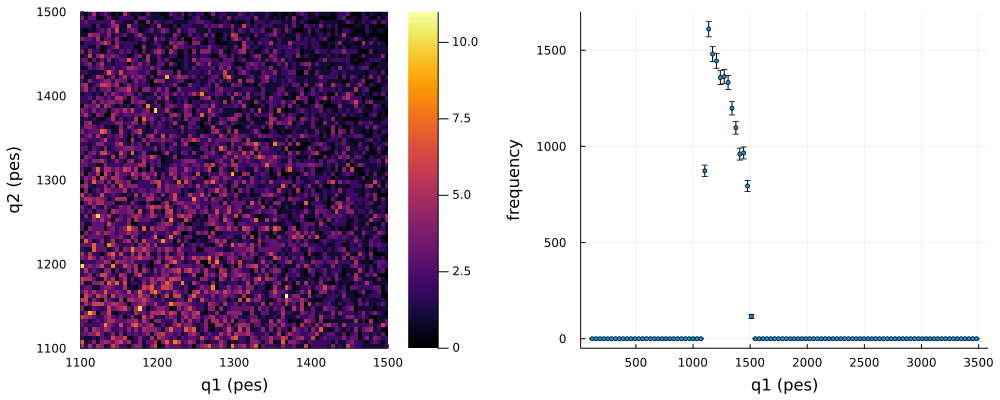

In [242]:
JPetalo.q1vsq2(ndfq)

## r vs q

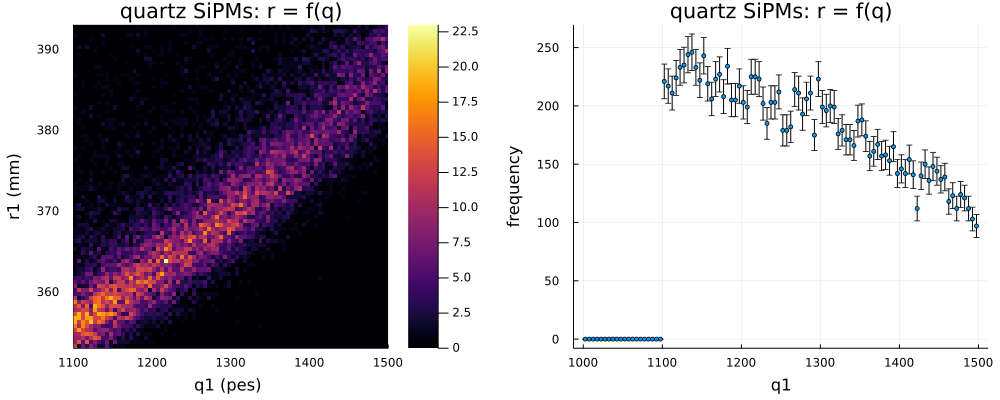

In [243]:
JPetalo.r1q1(ndfq,1000.0, 1500.0,tit="$sipm SiPMs: r = f(q)", filename="rq-$sipm-$proc")

In [244]:
cq, fq, pq = JPetalo.nfit_profile(ndfq, "q1","r1","q1 (pes) ","r1 (mm)", "pol2")

for q1=f(r1): fit parameters =[346.76094539676086, -0.03714570849522552, 4.310597705886946e-5]


([346.76094539676086, -0.03714570849522552, 4.310597705886946e-5], Main.JPetalo.var"#f2#49"{Vector{Float64}}([346.76094539676086, -0.03714570849522552, 4.310597705886946e-5]), Plot{Plots.GRBackend() n=2})

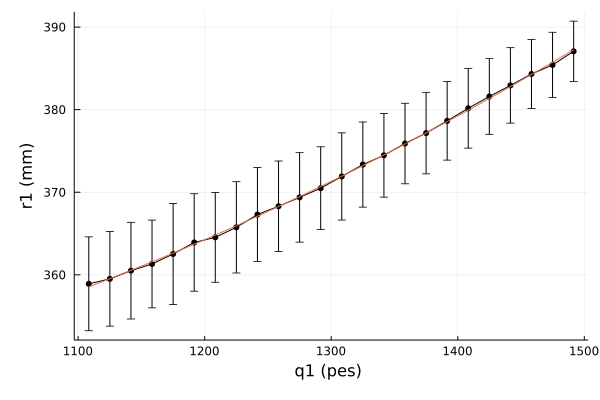

In [245]:
JPetalo.nplot_profile(pq, filename="rq-profile-fit-$sipm-$proc")

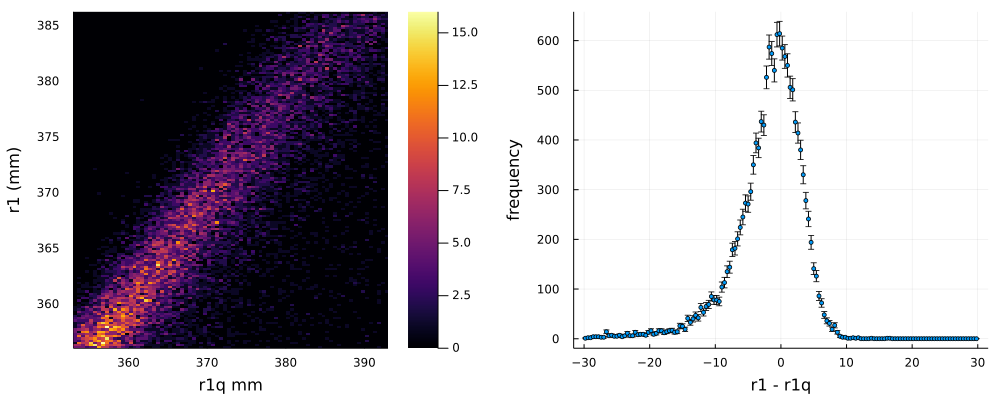

In [249]:
r1q = fq.(ndfq.q1) - 2.0 * ones(nrow(ndfq))
JPetalo.plotreso(r1q, ndfq.r1, "r1q mm", "r1 (mm)", "r1 - r1q", -30., 30., 150)

 σ =     3.7 mm

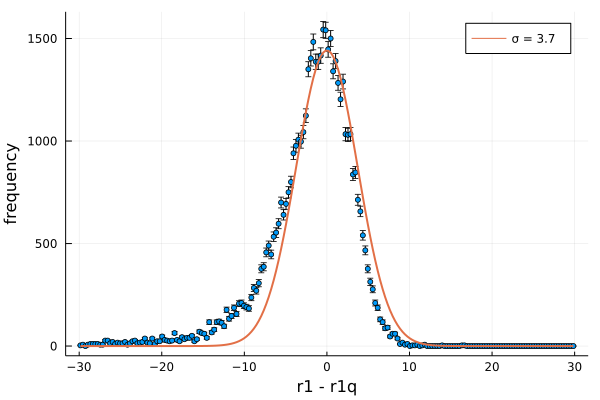

In [250]:
fg,p = JPetalo.fitg1(r1q - ndfq.r1, "r1 - r1q", 200, -30.0, 30.0, xgmin=-10.0, xgmax=10.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(p)

σt =   7.223 σ =   3.121

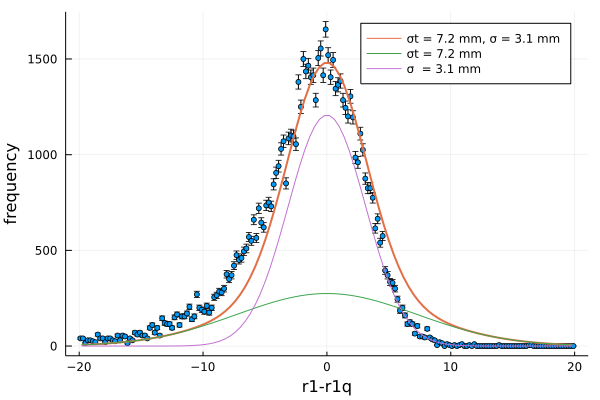

In [251]:
fg, p = JPetalo.fitg2(r1q - ndfq.r1, "r1-r1q", 200, -20.0, 20.0, 
                      xg1min=-20.0, xg1max=-5.0, 
                      xg2min=-5.0,  xg2max =5.0, 
                      xgmin =-20.0, xgmax  =20.0)
@printf "σt = %7.3f σ = %7.3f" fg.std[1] fg.std[2]
plot(p)

In [252]:
JPetalo.saveplot(p, "rq-resolution-$sipm-$proc")

In [253]:
cq2, fq2, p2q = JPetalo.nfit_profile(ndfq, "q2","r2","q2 (pes) ","r2 (mm)", "pol2")

for q2=f(r2): fit parameters =[342.26125268350023, -0.030059679062480932, 4.059659094484235e-5]


([342.26125268350023, -0.030059679062480932, 4.059659094484235e-5], Main.JPetalo.var"#f2#49"{Vector{Float64}}([342.26125268350023, -0.030059679062480932, 4.059659094484235e-5]), Plot{Plots.GRBackend() n=2})

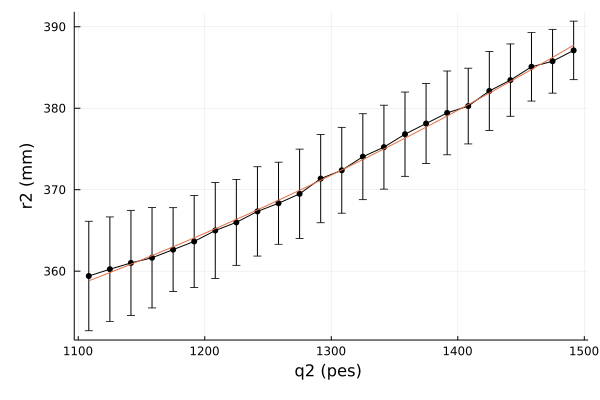

In [254]:
JPetalo.nplot_profile(p2q)

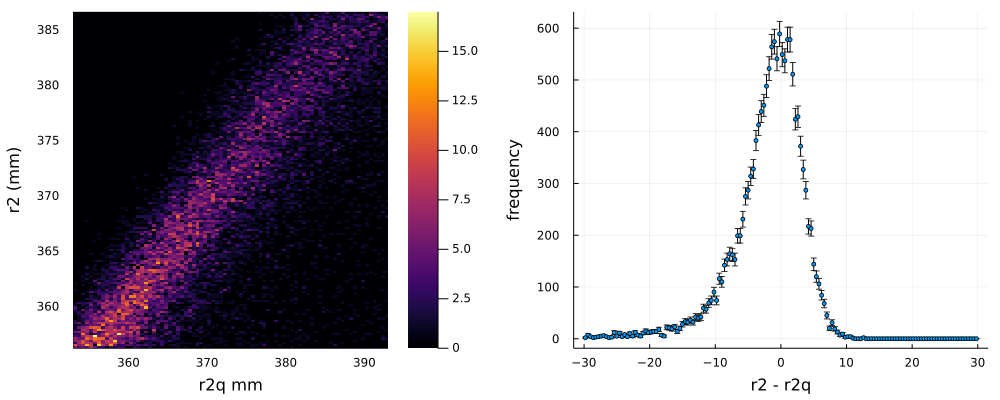

In [256]:
r2q = fq2.(ndfq.q2) - 2.0 * ones(length(ndfq.q2)) ;
JPetalo.plotreso( r2q, ndfq.r2, "r2q mm", "r2 (mm)", "r2 - r2q", -30., 30.)

 σ =     3.8 mm

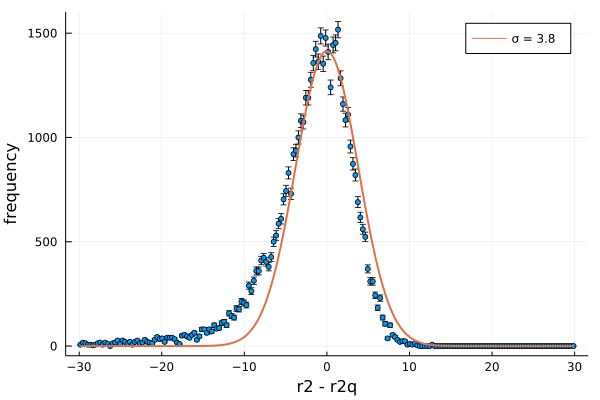

In [257]:
fg,p = JPetalo.fitg1(r2q - ndfq.r2, "r2 - r2q", 200, -30.0, 30.0, xgmin=-10.0, xgmax=10.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(p)

## ZSTD

In [271]:
ndfq =JPetalo.selectinterval(ndf, "q1", "q2", 1000.0, 1500.0);
println("after q1q2 cut: ndfq has a length of ", nrow(ndfq))

after q1q2 cut: ndfq has a length of 20803


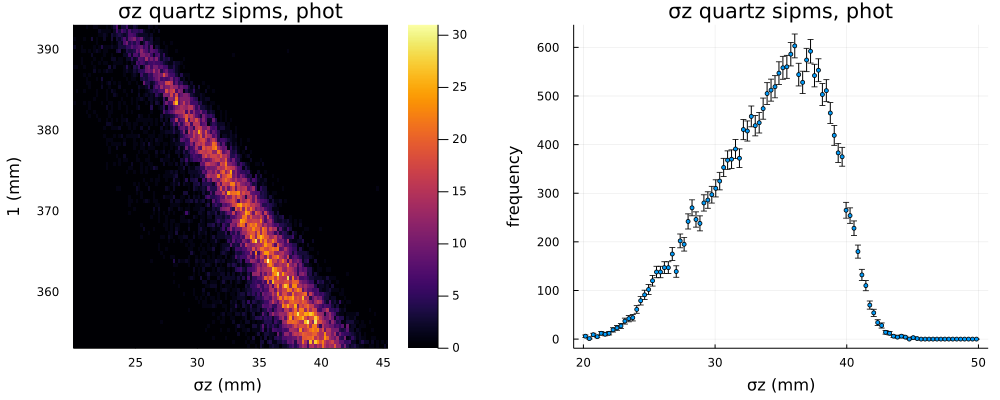

In [272]:
JPetalo.zstd(ndfq, 20.0, 50.0, tit="σz $sipm sipms, $proc", filename="zstd-$sipm-$proc")

In [273]:
ndfz =JPetalo.selectinterval(ndfq, "zstd1", "zstd2", 20.0, 35.0);

for zstd1=f(r1): fit parameters =[109.1354978538252, 29.56215915464262, -0.9927454497527756, 0.010217916555193766]


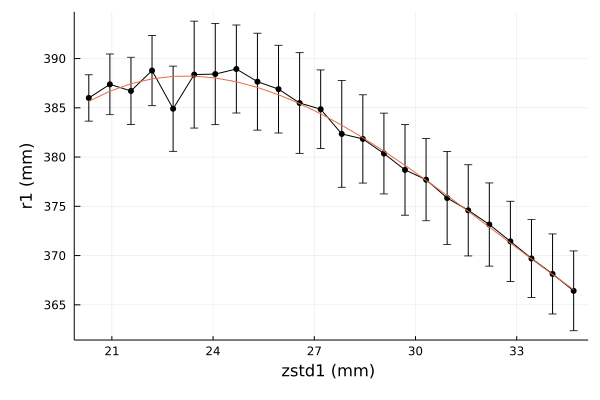

In [274]:
cz, fz, pz = JPetalo.nfit_profile(ndfz, "zstd1","r1","zstd1 (mm) ","r1 (mm)", "pol3")
JPetalo.nplot_profile(pz)

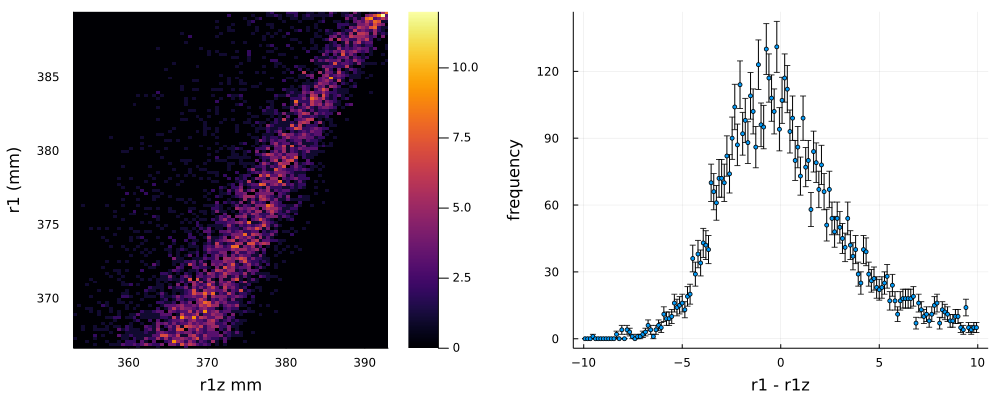

In [277]:
r1z = fz.(ndfz.zstd1) + 1.0 * ones(length(ndfz.q1)) ;
JPetalo.plotreso(r1z, ndfz.r1, "r1z mm", "r1 (mm)", "r1 - r1z", -10., 10.)

 σ =     2.9 mm

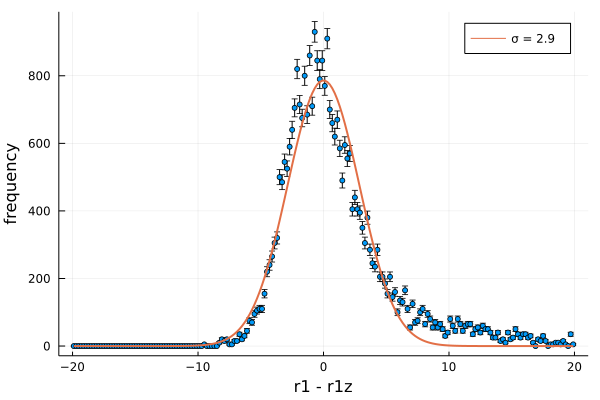

In [278]:
fg,p = JPetalo.fitg1(r1z - ndfz.r1, "r1 - r1z", 200, -20.0, 20.0, xgmin=-10.0, xgmax=10.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(p)

r-rz σ1 =   2.711 σ2 =  14.939

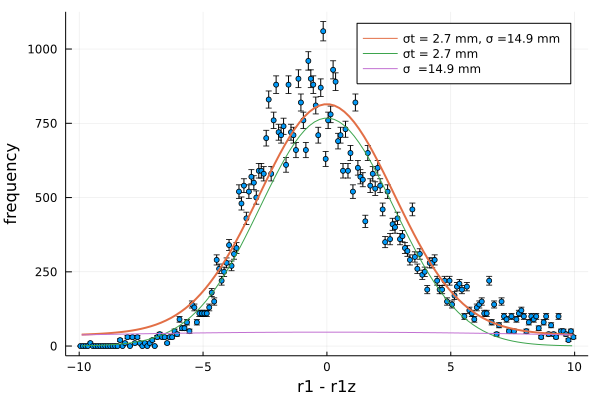

In [279]:
fg, p = JPetalo.fitg2(r1z - ndfz.r1, "r1 - r1z", 200, -10.0, 10.0, 
                      xg1min=-10.0, xg1max=-2.5, 
                      xg2min=-2.5,  xg2max =2.5, 
                      xgmin =-10.0, xgmax  =10.0)
@printf "r-rz σ1 = %7.3f σ2 = %7.3f" fg.std[1] fg.std[2]
plot(p)

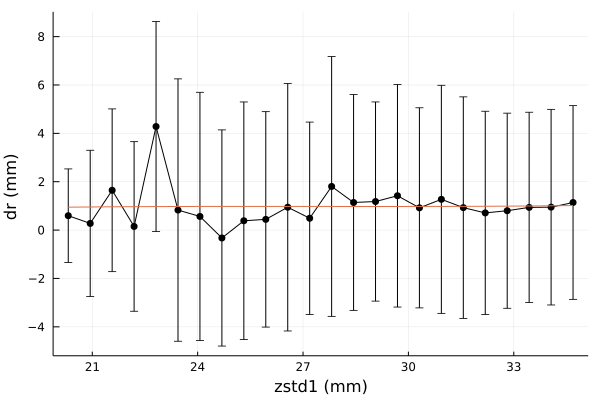

In [280]:
cx, fx, px = JPetalo.fit_profile(ndfz.zstd1, r1z - ndfz.r1, "zstd1 (mm)", "dr (mm) ", "pol3")
plot(px)

for zstd2=f(r2): fit parameters =[141.3090109036014, 26.17651616592815, -0.8746053102070785, 0.008849863243842782]


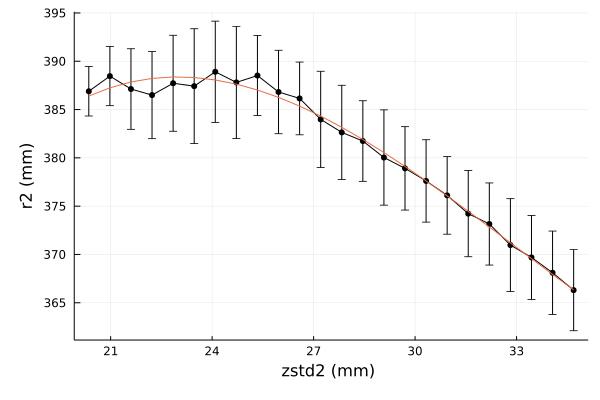

In [281]:
cz2, fz2, pz2 = JPetalo.nfit_profile(ndfz, "zstd2","r2","zstd2 (mm) ","r2 (mm)", "pol3")
JPetalo.nplot_profile(pz2)

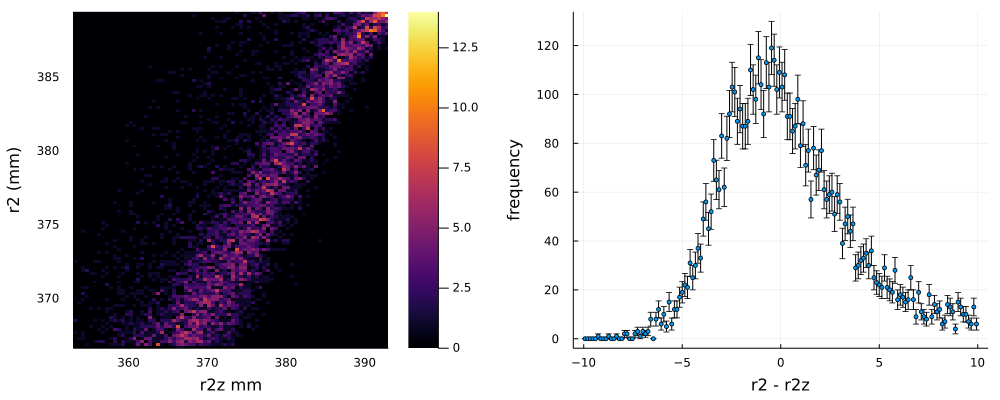

In [282]:
r2z = fz.(ndfz.zstd2) + 1.0 * ones(length(ndfz.q1)) ;
JPetalo.plotreso(r2z, ndfz.r2, "r2z mm", "r2 (mm)", "r2 - r2z", -10., 10.)

 σ =     3.0 mm

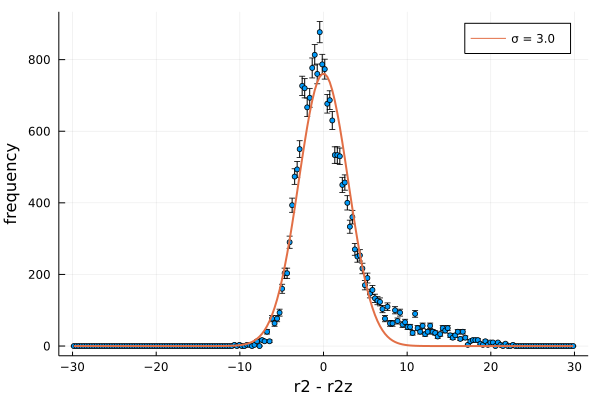

In [283]:
fg,p = JPetalo.fitg1(r2z - ndfz.r2, "r2 - r2z", 200, -30.0, 30.0, xgmin=-10.0, xgmax=10.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(p)

In [284]:
nrow(ndfz)

6105

## PhiSTD

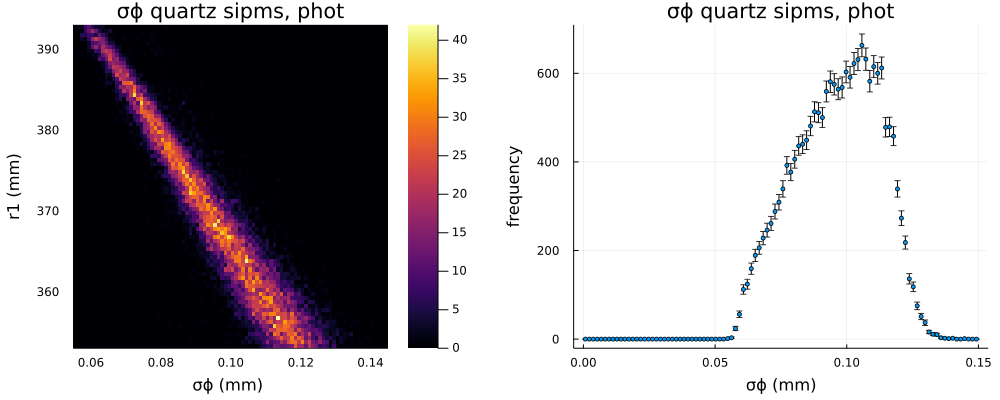

In [286]:
JPetalo.phistd(ndfq,0.0, 0.15, tit="σϕ $sipm sipms, $proc", filename="phistd-$sipm-$proc")

In [291]:
ndfp =JPetalo.selectinterval(ndfq, "phistd1", "phistd2", 0.07, 0.12);

for phistd1=f(r1): fit parameters =[337.87661211036055, 2655.200931361772, -38397.7167142525, 145844.39307900725]


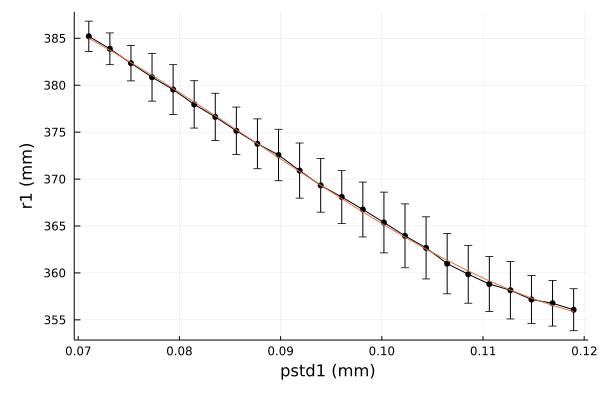

In [292]:
cp, fp, pp = JPetalo.nfit_profile(ndfp, "phistd1","r1","pstd1 (mm) ","r1 (mm)", "pol3")
JPetalo.nplot_profile(pp, filename="phistd-naked-profile-fit")

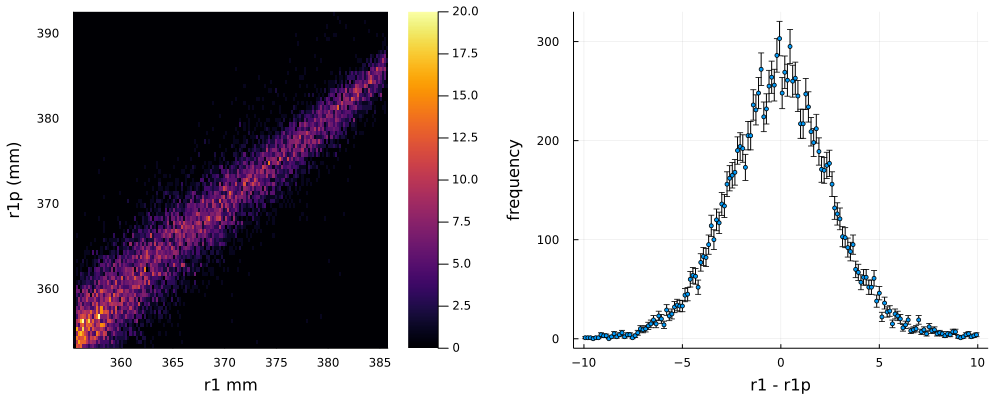

In [296]:
r1p = fp.(ndfp.phistd1) + 0.0 * ones(length(ndfp.q1))
JPetalo.plotreso(ndfp.r1, r1p, "r1 mm", "r1p (mm)", "r1 - r1p", -10., 10.)

 σ =     2.5 mm

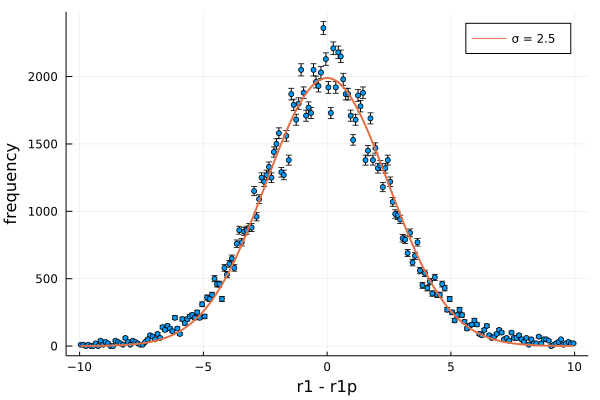

In [297]:
fg,pg = JPetalo.fitg1(ndfp.r1 - r1p, "r1 - r1p", 200, -10.0, 10.0, xgmin=-5.0, xgmax=5.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(pg)

zt-zr σ1 =   3.456 σ2 =   2.196

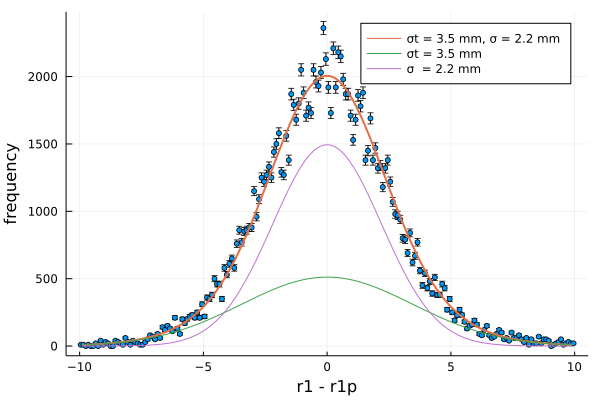

In [298]:
fg, p = JPetalo.fitg2(ndfp.r1 - r1p, "r1 - r1p", 200, -10.0, 10.0, 
                      xg1min=-10.0, xg1max=-2.5, 
                      xg2min=-2.5,  xg2max =2.5, 
                      xgmin =-10.0, xgmax  =10.0)
@printf "zt-zr σ1 = %7.3f σ2 = %7.3f" fg.std[1] fg.std[2]
plot(p)

In [299]:
JPetalo.saveplot(p, "phistd-resolution-$sipm-$proc")

In [300]:
@printf "Resolution in R (σϕ estimaor) FWHM = %7.1f %s" 2.3 * fg.std[2] "mm" 

Resolution in R (σϕ estimaor) FWHM =     5.1 mm

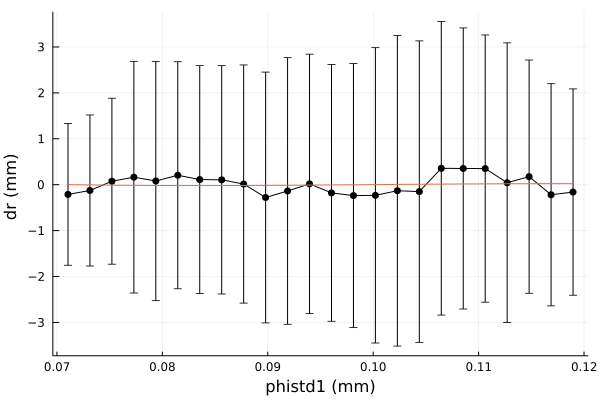

In [301]:
cx, fx, px = JPetalo.fit_profile(ndfp.phistd1, r1p - ndfp.r1, "phistd1 (mm)", "dr (mm) ", "pol3")
plot(px)

for phistd2=f(r2): fit parameters =[325.5475859051833, 3039.034563588842, -42321.51310066019, 158994.32974992046]


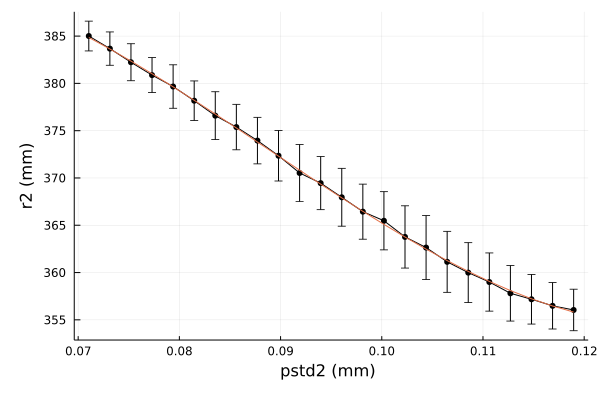

In [302]:
cp2, fp2, pp2 = JPetalo.nfit_profile(ndfp, "phistd2","r2","pstd2 (mm) ","r2 (mm)", "pol3")
JPetalo.nplot_profile(pp2)

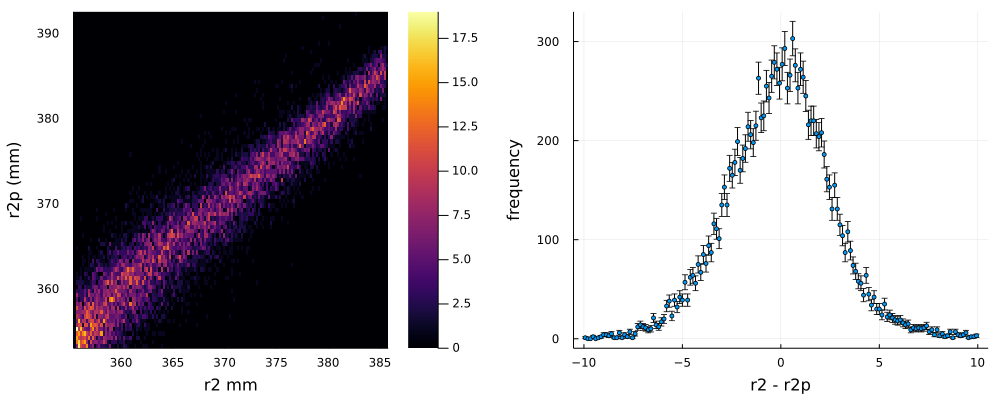

In [304]:
r2p = fp.(ndfp.phistd2) + 0.0 * ones(length(ndfp.q2))
JPetalo.plotreso(ndfp.r2, r2p, "r2 mm", "r2p (mm)", "r2 - r2p", -10., 10.)

 σ =     2.4 mm

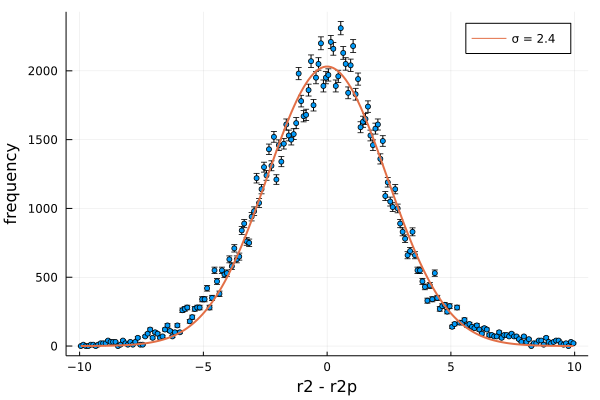

In [305]:
fg,pg = JPetalo.fitg1(ndfp.r2 - r2p, "r2 - r2p", 200, -10.0, 10.0, xgmin=-5.0, xgmax=5.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(pg)

In [306]:
println("total number of interactions = ", nrow(ndfq),
    " selected with zstd estimator = ", nrow(ndfz),
    " selected with phistd estimator = ", nrow(ndfp))
    

total number of interactions = 20803 selected with zstd estimator = 6105 selected with phistd estimator = 12697


## Resolution in (x,y,z,r) intrinsic

In [307]:
function ires(df; lim = 10.0)
    hx, px = JPetalo.hist1d(df.xt1 - df.x1, "xt - xr", 50,  -lim, lim)
    hz, pz = JPetalo.hist1d(df.zt1 - df.z1, "zt - zr", 50,  -lim, lim)
    plot(px,pz, layout= (1, 2), size = (800, 400), legend=false, fmt = :png,
        left_margin=5Plots.mm, right_margin=1Plots.mm, bottom_margin=5Plots.mm)
end

ires (generic function with 1 method)

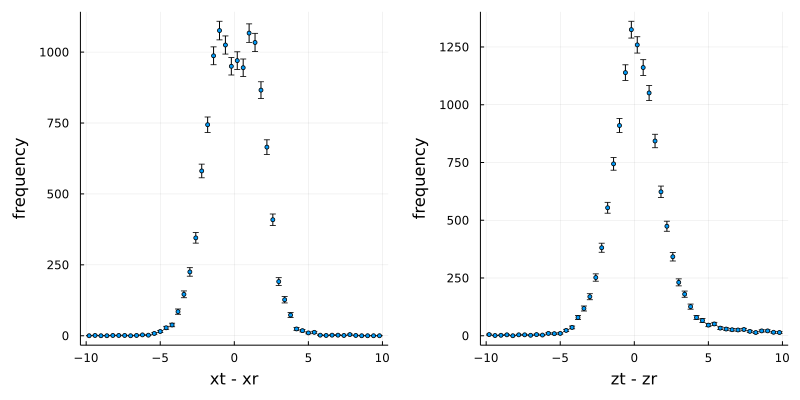

In [308]:
ires(ndfp, lim = 10.0)

zt-zr σ1 =   2.224 σ2 =   1.208

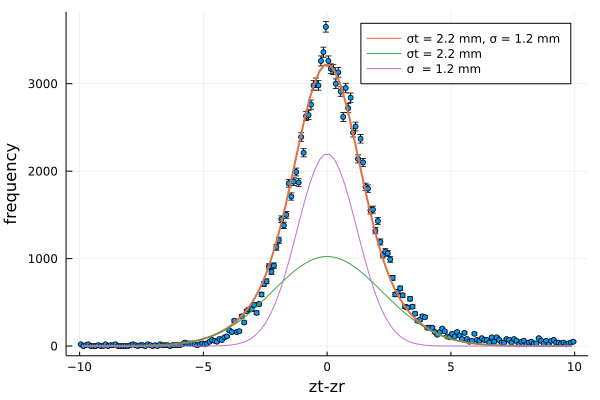

In [309]:
fg, p = JPetalo.fitg2(ndfp.zt1 - ndfp.z1, "zt-zr", 200, -10.0, 10.0, 
                      xg1min=-10.0, xg1max=-2.5, 
                      xg2min=-2.5,  xg2max =2.5, 
                      xgmin =-10.0, xgmax  =10.0)
@printf "zt-zr σ1 = %7.3f σ2 = %7.3f" fg.std[1] fg.std[2]
plot(p)

 σ =     1.5 mm

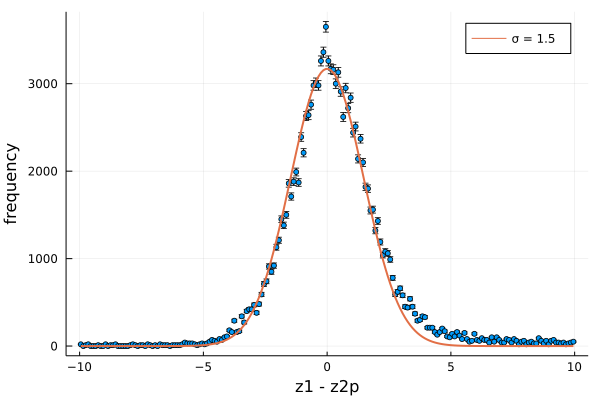

In [310]:
fg,pg = JPetalo.fitg1(ndfp.zt1 - ndfp.z1, "z1 - z2p", 200, -10.0, 10.0, xgmin=-3.0, xgmax=3.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(pg)

## Position from best estimator (r1p, r1z)

In [311]:
xp1,yp1,zp1 = JPetalo.radial_correction(ndfp.xr1, ndfp.yr1, ndfp.zr1, r1p);
xp2,yp2,zp2 = JPetalo.radial_correction(ndfp.xr2, ndfp.yr2, ndfp.zr2, r2p);

In [312]:
xz1,yz1,zz1 = JPetalo.radial_correction(ndfz.xr1, ndfz.yr1, ndfz.zr1, r1z);
xz2,yz2,zz2 = JPetalo.radial_correction(ndfz.xr2, ndfz.yr2, ndfz.zr2, r2z);

 σ =     1.9 mm

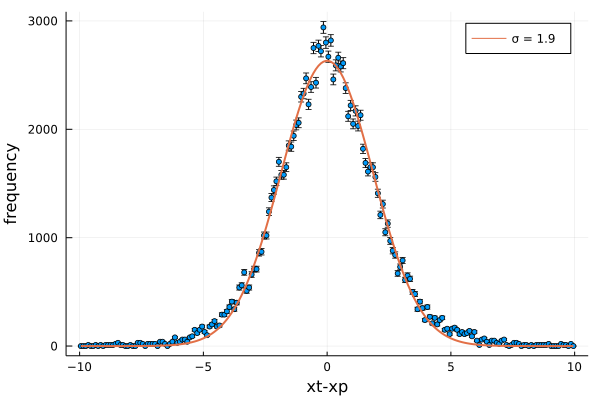

In [313]:
fg,px1 = JPetalo.fitg1(ndfp.xt1 - xp1, "xt-xp", 200, -10.0, 10.0, xgmin=-5.0, xgmax=5.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(px1)

In [314]:
JPetalo.saveplot(p, "phistd-x-resolution-$sipm-$proc")

In [316]:
@printf " resolution in (x,y,z) FWHM  = %7.1f mm" 2.3 * fg.std[1] 

 resolution in (x,y,z) FWHM  =     4.3 mm

 σ =     1.9 mm

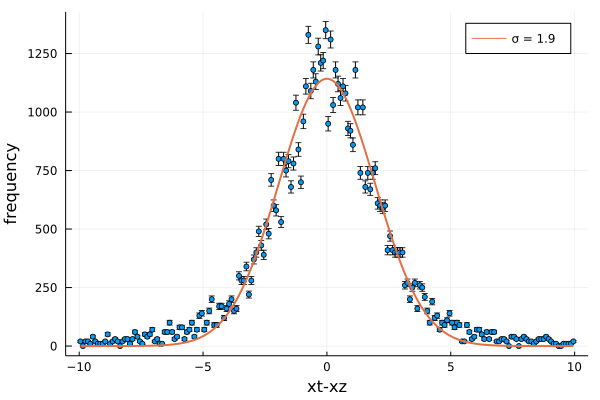

In [318]:
fg,px1 = JPetalo.fitg1(ndfz.xt1 - xz1, "xt-xz", 200, -10.0, 10.0, xgmin=-5.0, xgmax=5.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(px1)

In [319]:
JPetalo.saveplot(p, "zstd-x-resolution-$sipm-$proc")

In [320]:
fg,py = JPetalo.fitg1(ndfp.yt1 - yp1, "yt-yr", 200, -10.0, 10.0, xgmin=-5.0, xgmax=5.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(py);

 σ =     2.1 mm

In [322]:
fg,pz = JPetalo.fitg1(ndfp.zt1 - zp1, "zt-zr", 200, -10.0, 10.0, xgmin=-5.0, xgmax=5.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(pz);

 σ =     1.5 mm

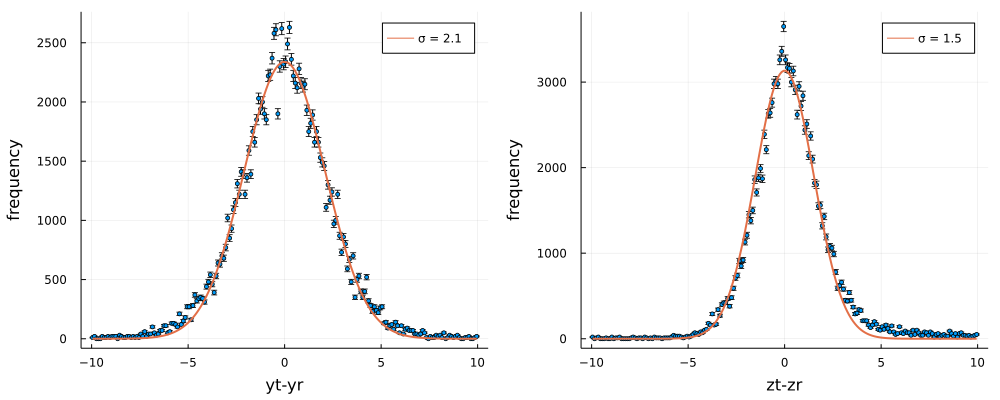

In [323]:
plot(py, pz,  layout= (1, 2), legend=true, fmt = :png,  size = (1000, 400),
        left_margin=5Plots.mm, right_margin=1Plots.mm, bottom_margin=5Plots.mm)


In [324]:
fg,px = JPetalo.fitg1(ndfp.xt2 - xp2, "xt2-xr2", 200, -10.0, 10.0, xgmin=-5.0, xgmax=5.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(px);

 σ =     1.8 mm

In [325]:
fg,py = JPetalo.fitg1(ndfp.yt2 - yp2, "yt2-yr2", 200, -10.0, 10.0, xgmin=-5.0, xgmax=5.0)
@printf " σ = %7.1f mm" fg.std[1] 
plot(py);

 σ =     2.1 mm

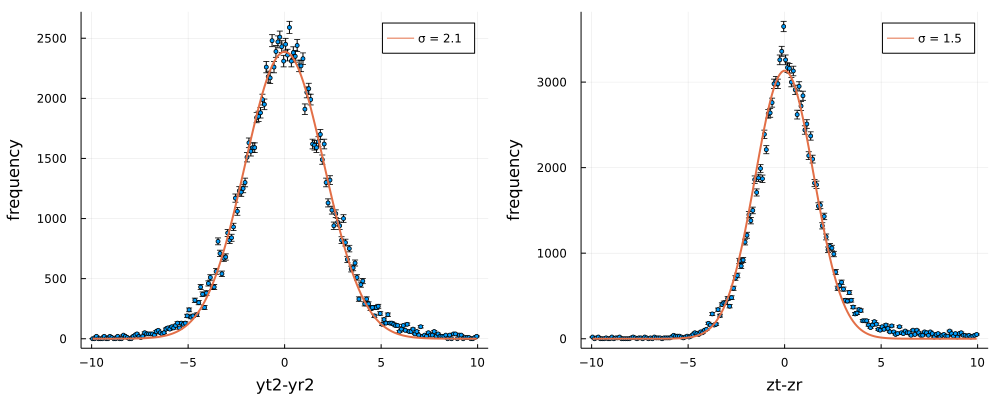

In [326]:
plot(py, pz,  layout= (1, 2), legend=true, fmt = :png,  size = (1000, 400),
        left_margin=5Plots.mm, right_margin=1Plots.mm, bottom_margin=5Plots.mm)

## TOF

In [327]:
dfu = JPetalo.setunits(ndfq, "v2");

In [328]:
dfup = JPetalo.setunits(ndfp, "v2");

In [329]:
dfuz = JPetalo.setunits(ndfz, "v2");

In [330]:
dt12 = JPetalo.deltatime(dfu, JPetalo.dtfirst);

In [331]:
t12 = dt12./ps;

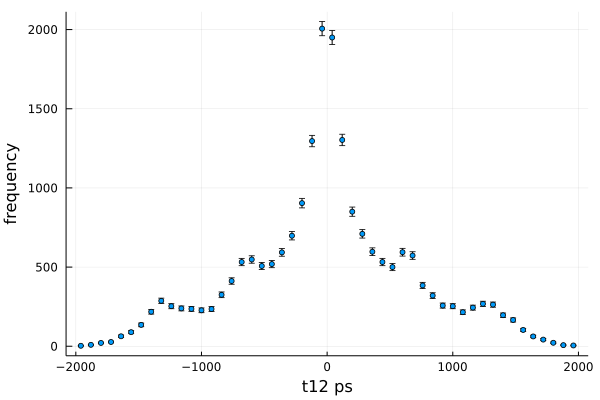

In [332]:
h,p       = JPetalo.hist1d(t12, "t12 ps", 50,  -2000., 2000.)
plot(p)

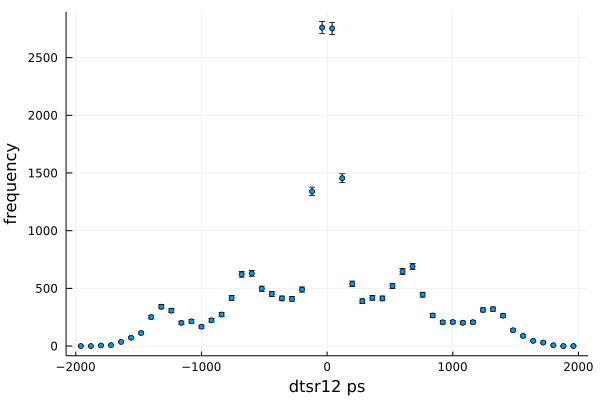

In [333]:
dtsr12 = JPetalo.ctsr(dfu, JPetalo.postrue)
tsr12 = dtsr12./ps
h,p       = JPetalo.hist1d(tsr12, "dtsr12 ps", 50,  -2000., 2000.)
plot(p)

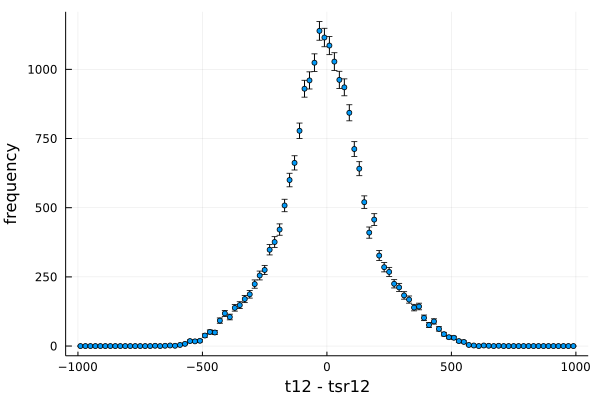

In [334]:
h,p       = JPetalo.hist1d(t12-tsr12, "t12 - tsr12", 100,  -1000., 1000.)
plot(p)

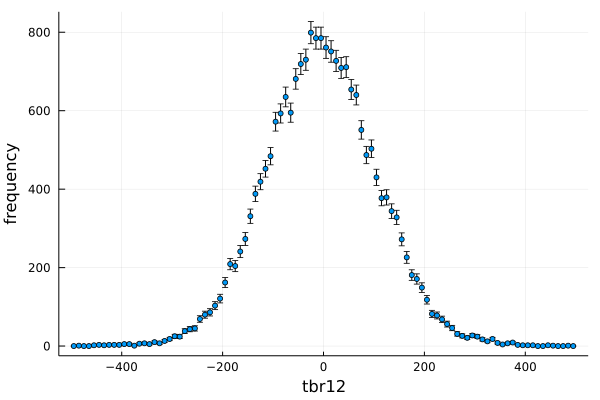

In [335]:
dtrb12 = JPetalo.cdoi(dfu, r1q, r2q,JPetalo.postrue);
trb12 = dtrb12 ./ps
h,p       = JPetalo.hist1d(trb12, "tbr12", 100,  -500., 500.)
plot(p)

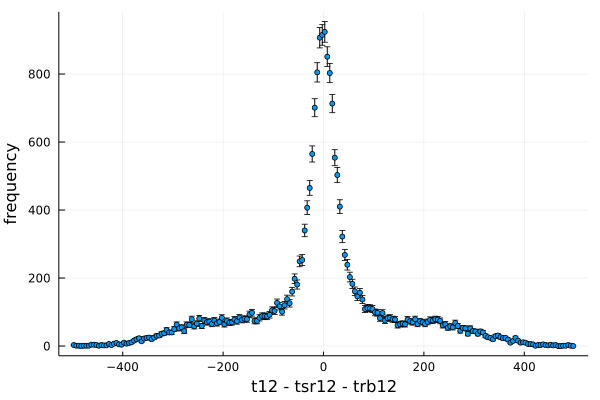

In [336]:
h,p       = JPetalo.hist1d(t12 - tsr12 - trb12  , "t12 - tsr12 - trb12", 200,  -500., 500.)
plot(p)

In [337]:
dt = t12 - tsr12 - trb12;

sigma1 = 200.157 sigma2 =  23.191

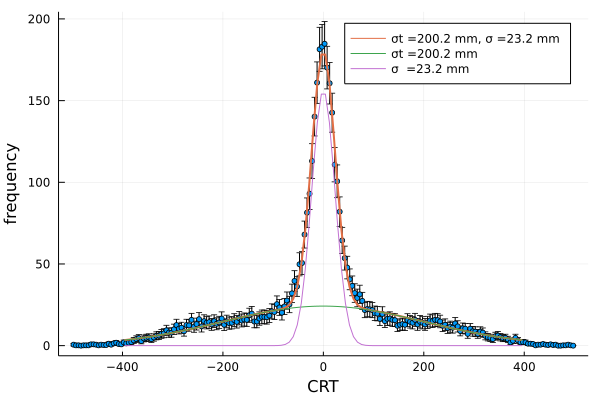

In [338]:
fg, p = JPetalo.fitg2(dt, "CRT", 200, -500.0, 500.0, 
                      xg1min=-400.0, xg1max=-50.0, 
                      xg2min=-50.0,  xg2max =50.0, 
                      xgmin =-400.0, xgmax  =400.0)
@printf "sigma1 = %7.3f sigma2 = %7.3f" fg.std[1] fg.std[2]
plot(p)

In [339]:
JPetalo.saveplot(p, "tof-resolution-intrinsic-$sipm-$proc")

First photon, position true: FWHM1 = 460.362 FWHM2 =  53.338

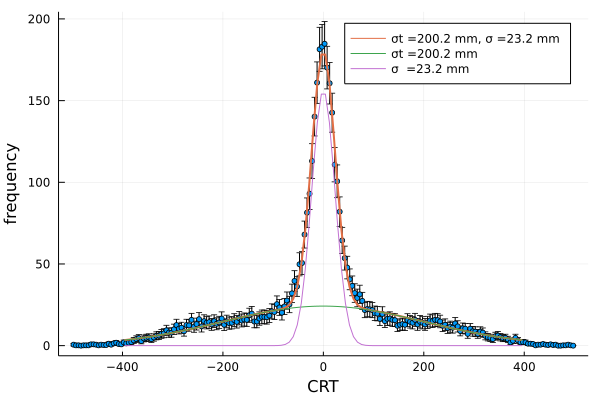

In [340]:
dt = JPetalo.crt(dfu, r1p, r2p, JPetalo.dtfirst,JPetalo.postrue)
fg, p = JPetalo.fitg2(dt, "CRT", 200, -500.0, 500.0, 
                      xg1min=-400.0, xg1max=-50.0, 
                      xg2min=-50.0,  xg2max =50.0, 
                      xgmin =-400.0, xgmax  =400.0)
@printf "First photon, position true: FWHM1 = %7.3f FWHM2 = %7.3f" 2.3*fg.std[1] 2.3*fg.std[2]
plot(p)

average photoelectron, position reco: FWHM = 354.028

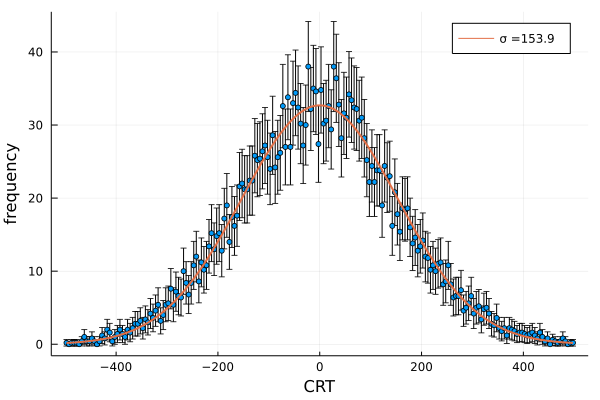

In [341]:
dt = JPetalo.crt(dfup, r1p, r2p, JPetalo.dtaverage,JPetalo.posrecall)
fg,p = JPetalo.fitg1(dt, "CRT", 200, -500.0, 500.0,  
                     xgmin=-400.0, xgmax=400.0)
@printf "average photoelectron, position reco: FWHM = %7.3f" 2.3*fg.std[1] 
plot(p)

average photoelectron, position reco: FWHM = 300.873

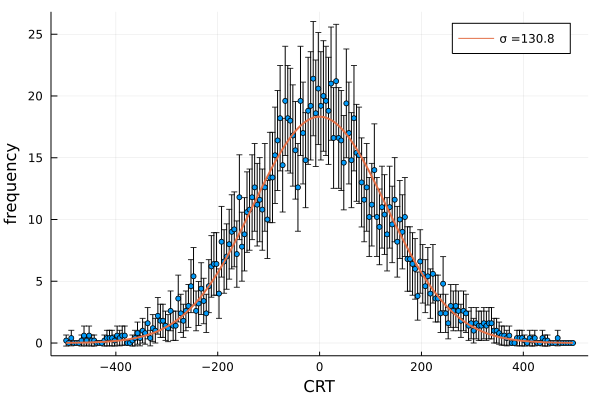

In [342]:
dt = JPetalo.crt(dfuz, r1z, r2z, JPetalo.dtaverage,JPetalo.posrecall)
fg,p = JPetalo.fitg1(dt, "CRT", 200, -500.0, 500.0,  
                     xgmin=-400.0, xgmax=400.0)
@printf "average photoelectron, position reco: FWHM = %7.3f" 2.3*fg.std[1] 
plot(p)

## Add rx1p and rx2p

In [343]:
ndfp[!,"r1p"] = r1p;
ndfp[!,"r2p"] = r2p;

In [344]:
nrow(ndfz)

6105

In [345]:
nrow(ndfp)

12697

In [346]:
ndfz[!,"r1z"] = r1z;
ndfz[!,"r2z"] = r2z;

In [347]:
println(names(ndfp))

["nsipm1", "nsipm2", "phistd1", "phistd2", "q1", "q2", "r1", "r2", "t1", "t2", "ta1", "ta2", "tr1", "tr2", "ux", "uy", "uz", "x1", "x2", "xb1", "xb2", "xr1", "xr2", "xs", "xt1", "xt2", "y1", "y2", "yb1", "yb2", "yr1", "yr2", "ys", "yt1", "yt2", "z1", "z2", "zb1", "zb2", "zr1", "zr2", "zs", "zstd1", "zstd2", "zt1", "zt2", "r1p", "r2p"]


In [348]:
println(names(ndfz))

["nsipm1", "nsipm2", "phistd1", "phistd2", "q1", "q2", "r1", "r2", "t1", "t2", "ta1", "ta2", "tr1", "tr2", "ux", "uy", "uz", "x1", "x2", "xb1", "xb2", "xr1", "xr2", "xs", "xt1", "xt2", "y1", "y2", "yb1", "yb2", "yr1", "yr2", "ys", "yt1", "yt2", "z1", "z2", "zb1", "zb2", "zr1", "zr2", "zs", "zstd1", "zstd2", "zt1", "zt2", "r1z", "r2z"]


## Save

In [349]:
JPetalo.writemdf(datadir("n3mdf-50ps"),"mdf-phistd-$sipm-$proc.csv", ndfp)

"/Users/jj/JuliaProjects/JPetalo/data/n3mdf-50ps/mdf-phistd-quartz-phot.csv"

In [350]:
JPetalo.writemdf(datadir("n3mdf-50ps"),"mdf-zstd-$sipm-$proc.csv", ndfz)

"/Users/jj/JuliaProjects/JPetalo/data/n3mdf-50ps/mdf-zstd-quartz-phot.csv"